# SymPy Demo

This was not covered in detail at the end of our course, but we were instructed to make this file so we would be able to use SymPy on a very basic level to solve problems in the future. The advantage of sympy lies in its ability to do numerics on symbolic data input. However, I find it a little bit slow. Perhaps I am using it incorrectly. Scroll below to see SymPy do a few things:

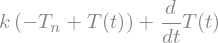

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
from sympy import init_printing
init_printing()
# rate of cooling differential equation
"""
T' = -k(T-Tn)
"""
t, k, T0, Tn = sympy.symbols('t, k, T_0, T_n')
T=sympy.Function('T')
ode = T(t).diff(t) + k * (T(t) - Tn)
ode

In [5]:

ode_sol = sympy.dsolve(ode)
print(ode_sol)

Eq(T(t), C1*exp(-k*t) + T_n)


In [6]:
ics={T(0) : T0}
C_eq = ode_sol.subs(t,0).subs(ics)
C_eq

In [7]:
C_sol = sympy.solve(C_eq)
C_sol

In [8]:
ode_sol.subs(C_sol[0])

In [9]:
"""
Simple pendulum:
theta'' + mu theta' + gsintheta / L = 0
x1=theta, x2=theta', k1=mu,k2=g/L
-> x1' = x2, x2' = -k1 x2 - k2 sin x1
vector x: [x1, x2], f(x) -> [x2, -k1 x2 - k2 sin x1]
"""

"\nSimple pendulum:\ntheta'' + mu theta' + gsintheta / L = 0\nx1=theta, x2=theta', k1=mu,k2=g/L\n-> x1' = x2, x2' = -k1 x2 - k2 sin x1\nvector x: [x1, x2], f(x) -> [x2, -k1 x2 - k2 sin x1]\n"

### Numerical Integration of ODEs using SciPy

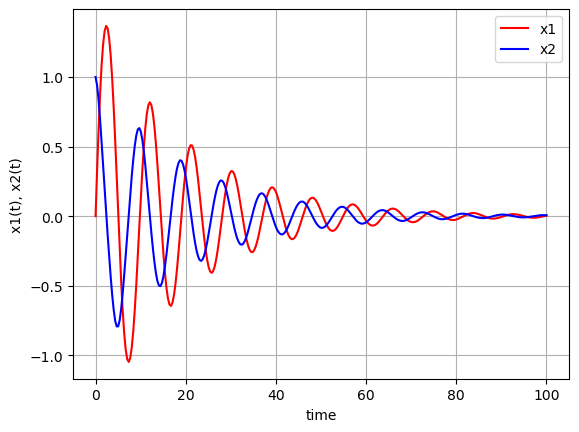

In [10]:
from scipy.integrate import odeint
def rhs(x, t, k1, k2):
  dxdt=[x[1],-k1*x[1]-k2*np.sin(x[0])]
  return dxdt
x0=[0,1]
time_int=np.linspace(0,100,300)
k1=0.1
k2=0.5
ode_sol=odeint(rhs,x0,time_int,args=(k1,k2))
plt.plot(time_int,ode_sol[:,0],'r',label='x1')
plt.plot(time_int,ode_sol[:,1],'b',label='x2')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('x1(t), x2(t)')
plt.grid()
plt.show()

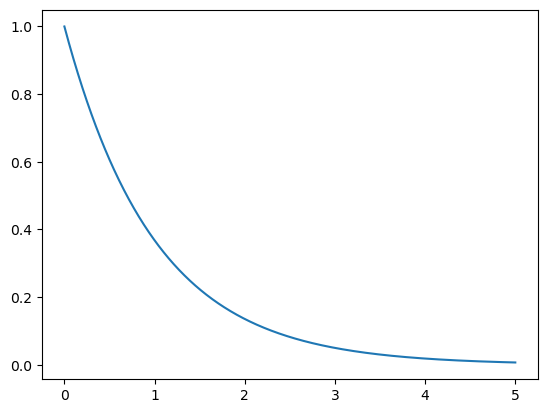

In [11]:
"""
note: dc/dt=-c/t (?), c(t)=c0*e^(-t/t (?))
"""
def rhs(C,T,tau):
  return -C/tau
t=np.linspace(0,5,1000)
C0=1
tau=1
C=odeint(rhs,C0,t,args=(tau,))
#nxt plot sol
plt.plot(t,C)
plt.show()

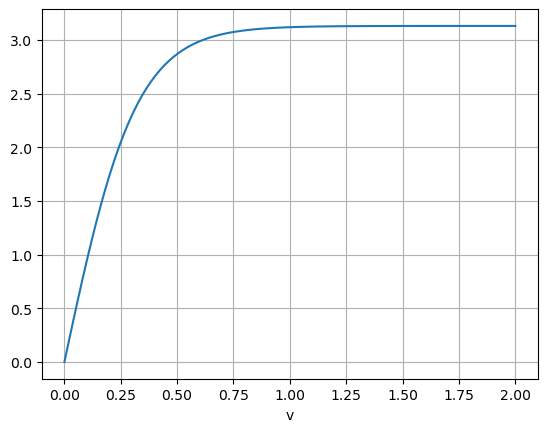

In [12]:
"""dv/dt=g-cv^2
g=9.8,c=1,v0=0,tm=2
integrate from 0 to max t (2)"""
v0=0
def rhs(v,t, g=9.8, c=1):
  dvdt=g-c*v*v
  return dvdt
v0=0.0
t=np.linspace(0,2,100)
v=odeint(rhs,v0,t)
plt.plot(t,v)
plt.xlabel('t')
plt.xlabel('v')
plt.grid()
plt.show()

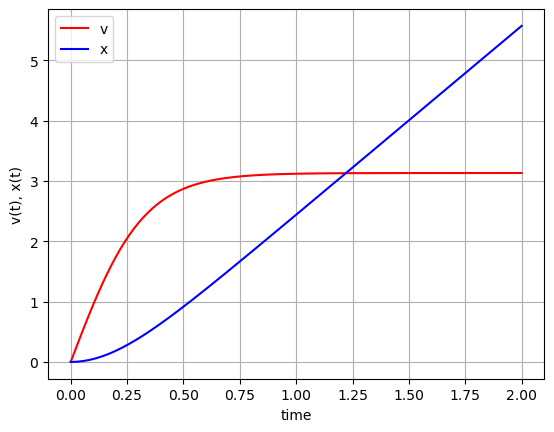

In [13]:
def rhs(vx, t):
  v=vx[0]
  x=vx[1]
  c=1
  g=9.8
  return np.array([g - c * v * v, v])
t=np.linspace(0,2,200)
vx=[0,0]
ode_sol=odeint(rhs,vx,t)
plt.plot(t,ode_sol[:,0],'r',label='v')
plt.plot(t,ode_sol[:,1],'b',label='x')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('v(t), x(t)')
plt.grid()
plt.show()